# Subtype prediction on the GSE56600 DNAm dataset from 227 pediatric B-cell ALL samples ([Lee et al., 2015](https://doi.org/10.1093/nar/gkv103))

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
import seaborn as sns
import joblib
import sys
sys.path.append('../Train_Predict_modules/')
from NSCmodelsV2 import *
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
path = '../test_data/DNAm/'
testX =  joblib.load(path + 'DNAm_test_v2.pkl')
testpheno = joblib.load(path + 'DNAm_pheno_test.pkl')


# The CpG sites have been already filtered according to 519 sites selected by ALLIUM (to reduce file size as well)

In [3]:
testX.shape

(227, 519)

In [4]:
pathsep = '../ALLIUM_signatures/'

In [5]:
unique_genedf = pd.read_csv(pathsep + 'CpGsSelectedNSCv2.csv')

In [6]:
unique_genedf

,Subtype,TargetID,Gene,CHR
0,aneuploidy,cg02385230,IGFBP4,17.0
1,aneuploidy,cg02522367,LCN6,9.0
2,aneuploidy,cg02657865,TNXB,6.0
3,aneuploidy,cg03148927,LARS2,3.0
4,aneuploidy,cg03630596,C9orf139;FUT7,9.0
...,...,...,...,...
514,Control,cg25557432,MACROD2,20.0
515,Control,cg25627226,NaN,18.0
516,Control,cg26059153,MACROD2,20.0
517,Control,cg26115633,FOXI2,10.0


In [7]:
unique_genedf.Subtype.value_counts()

11q23/MLL                    38
T-ALL                        37
Hypo                         37
ZNF384-r                     36
HeH                          34
ETV6-group                   33
MEF2D-r                      32
DUX4-r                       31
PAX5alt                      27
PAX5 p.Pro80Arg              27
Control                      26
aneuploidy                   25
t(1;19)                      25
NUTM1-r                      23
low HeH                      21
ph-group                     19
t(9;22)_vs_ph-like           19
t(12;21)_vs_t(12;21)-like    16
iAMP21                       13
Name: Subtype, dtype: int64

In [8]:
finalsignatures = unique_genedf.copy()
finalsignatures.Subtype.value_counts(dropna = False)

11q23/MLL                    38
T-ALL                        37
Hypo                         37
ZNF384-r                     36
HeH                          34
ETV6-group                   33
MEF2D-r                      32
DUX4-r                       31
PAX5alt                      27
PAX5 p.Pro80Arg              27
Control                      26
aneuploidy                   25
t(1;19)                      25
NUTM1-r                      23
low HeH                      21
ph-group                     19
t(9;22)_vs_ph-like           19
t(12;21)_vs_t(12;21)-like    16
iAMP21                       13
Name: Subtype, dtype: int64

In [9]:
finalsignatures.shape

(519, 4)

In [10]:
modelpath = '../ALLIUM_models/ALLIUM_DNAm/'

In [11]:
model = joblib.load(modelpath + '/model_NSCv2_dnam.pkl')
imp = joblib.load(modelpath + 'NAimputerNSCv2_dnam.pkl') # same imputation applied as in our design cohort

In [12]:
model

{'aneuploidy': NearestCentroid(),
 'Overall_aneuploidy': NearestCentroid(),
 'ph-group': NearestCentroid(),
 't(9;22)_vs_ph-like': NearestCentroid(),
 'ETV6-group': NearestCentroid(),
 't(12;21)_vs_t(12;21)-like': NearestCentroid(),
 'T-ALL': NearestCentroid(),
 'DUX4-r': NearestCentroid(),
 'PAX5alt': NearestCentroid(),
 '11q23/MLL': NearestCentroid(),
 'ZNF384-r': NearestCentroid(),
 't(1;19)': NearestCentroid(),
 'MEF2D-r': NearestCentroid(),
 'PAX5 p.Pro80Arg': NearestCentroid(),
 'NUTM1-r': NearestCentroid(),
 'Control': NearestCentroid()}

# Predict the external validation cohort

In [13]:
sum(testX.index == testpheno.index)

227

In [14]:
testpheno

,tissue,subjects,age,gender,cytogenetics,Subtype_updated
public_id,,,,,,
0121C,bone marrow / peripheral blood,children with B-ALL (California Childhood Canc...,2,F,hyperdiploid,HeH
0419C,bone marrow / peripheral blood,children with B-ALL (California Childhood Canc...,3.5,M,hyperdiploid,HeH
0544C,bone marrow / peripheral blood,children with B-ALL (California Childhood Canc...,5.2,F,hyperdiploid,HeH
0592C,bone marrow / peripheral blood,children with B-ALL (California Childhood Canc...,4.5,F,hyperdiploid,HeH
0166C,bone marrow / peripheral blood,children with B-ALL (California Childhood Canc...,2.4,M,hyperdiploid,HeH
...,...,...,...,...,...,...
U017C,bone marrow / peripheral blood,children with B-ALL (California Childhood Canc...,NA,NA,unknown,B-other
U018C,bone marrow / peripheral blood,children with B-ALL (California Childhood Canc...,NA,NA,unknown,B-other
U019C,bone marrow / peripheral blood,children with B-ALL (California Childhood Canc...,NA,NA,unknown,B-other


# DNAm predictions work with signature_mode as separate, meaning that each classifier using its own signatures 

In [15]:
valgen = predictionsNSC(model = model, discoverydf = testX, discoverypheno = testpheno, 
                        clinicaldatalist = ['Subtype_updated'],
                        unique_genedf = finalsignatures, subtypecol = 'Subtype', 
                        ids = 'TargetID', name = 'DNAm_subtype', datatype = 'DNAm',  
                        signature_mode = 'separate', imputation = imp)

Starting with subtype group aneuploidy
-------Start multiclass approach-----------
Starting with subtype group ph-group
-------Start one vs one approach-----------
---------------t(9;22) vs ph-like---------------
Starting with subtype group ETV6-group
-------Start one vs one approach-----------
---------------t(12;21) vs t(12;21)-like---------------
Starting with subtype group T-ALL
Starting with subtype group DUX4-r
Starting with subtype group PAX5alt
Starting with subtype group 11q23/MLL
Starting with subtype group ZNF384-r
Starting with subtype group t(1;19)
Starting with subtype group MEF2D-r
Starting with subtype group PAX5 p.Pro80Arg
Starting with subtype group NUTM1-r
Starting with subtype group Control


In [16]:
multicases = valgen[(valgen.Subtype_updated != 'B-other') & (valgen['DNAm_subtype'] == 'multiclass')]
multicases.shape

(11, 31)

In [17]:
sum(multicases['Subtype_updated'] == multicases['DNAm_subtype_V2'])

9

In [18]:
valgen

,Subtype_updated,aneuploidy.classifier.proba,HeH.classifier.proba,low HeH.classifier.proba,iAMP21.classifier.proba,Hypo.classifier.proba,ph-group.classifier.proba,t(9;22).classifier.proba,ph-like.classifier.proba,ETV6-group.classifier.proba,...,Control.classifier.proba,#predicted.classes,DNAm_subtype,Subtype detailed_v1,Probability detailed_v1,DNAm_subtype_groups,#classes.updated,DNAm_probability_V2,DNAm_subtype_V2,DNAm_subtype_comments
public_id,,,,,,,,,,,,,,,,,,,,,
0121C,HeH,0.936674,0.567518,0.176588,0.120035,0.135859,0.237236,NaN,NaN,0.071391,...,0.068810,1,aneuploidy,aneuploidy,0.9367,aneuploidy,1,0.5675,HeH,Manual check is required
0419C,HeH,0.829489,0.805710,0.093412,0.037118,0.063760,0.159194,NaN,NaN,0.065255,...,0.038719,1,aneuploidy,aneuploidy,0.8295,aneuploidy,1,0.8057,HeH,Passed control
0544C,HeH,0.937782,0.743155,0.103960,0.056258,0.096627,0.499146,NaN,NaN,0.040394,...,0.025206,1,aneuploidy,aneuploidy,0.9378,aneuploidy,1,0.7432,HeH,Passed control
0592C,HeH,0.926232,0.809272,0.091553,0.038404,0.060771,0.301724,NaN,NaN,0.093421,...,0.033982,1,aneuploidy,aneuploidy,0.9262,aneuploidy,1,0.8093,HeH,Passed control
0166C,HeH,0.915251,0.413943,0.266825,0.136287,0.182944,0.187758,NaN,NaN,0.043262,...,0.029078,1,aneuploidy,aneuploidy,0.9153,aneuploidy,1,0.4139,HeH,Manual check is required
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U017C,B-other,0.908898,0.355373,0.191114,0.212873,0.240640,0.273425,NaN,NaN,0.052702,...,0.027495,1,aneuploidy,aneuploidy,0.9089,aneuploidy,1,0.3554,HeH,Manual check is required
U018C,B-other,0.098718,NaN,NaN,NaN,NaN,0.133659,NaN,NaN,0.071968,...,0.059658,1,t(1;19),t(1;19),0.9323,t(1;19),1,0.9323,t(1;19),Passed control
U019C,B-other,0.377542,NaN,NaN,NaN,NaN,0.150010,NaN,NaN,0.059869,...,0.164044,0,no_class,no_class,<0.5,no_class,0,<0.5,no_class,No class prediction


In [19]:
valgen.to_csv('../outputs/DNAm_GEO_predictions.csv')

In [20]:
sum(valgen.DNAm_subtype_V2 == testpheno.Subtype_updated)

112

In [21]:
valgen[(valgen.DNAm_subtype_V2 != testpheno.Subtype_updated) &(valgen.Subtype_updated != 'B-other')]

,Subtype_updated,aneuploidy.classifier.proba,HeH.classifier.proba,low HeH.classifier.proba,iAMP21.classifier.proba,Hypo.classifier.proba,ph-group.classifier.proba,t(9;22).classifier.proba,ph-like.classifier.proba,ETV6-group.classifier.proba,...,Control.classifier.proba,#predicted.classes,DNAm_subtype,Subtype detailed_v1,Probability detailed_v1,DNAm_subtype_groups,#classes.updated,DNAm_probability_V2,DNAm_subtype_V2,DNAm_subtype_comments
public_id,,,,,,,,,,,,,,,,,,,,,
0689C,HeH,0.131501,NaN,NaN,NaN,NaN,0.170101,NaN,NaN,0.959326,...,0.042816,1,ETV6-group,ETV6-group,0.9593,ETV6-group,1,0.7622,t(12;21),Passed control
0354C,HeH,0.180812,NaN,NaN,NaN,NaN,0.187929,NaN,NaN,0.079473,...,0.941285,1,Control,Control,0.9413,Control,1,0.9413,Control,Passed control
0388C,HeH,0.325274,NaN,NaN,NaN,NaN,0.195994,NaN,NaN,0.051499,...,0.476890,0,no_class,no_class,<0.5,no_class,0,<0.5,no_class,No class prediction
1662C,HeH,0.180371,NaN,NaN,NaN,NaN,0.169511,NaN,NaN,0.050894,...,0.737507,1,Control,Control,0.7375,Control,1,0.7375,Control,Passed control
0591C,HeH,0.857256,0.174401,0.274070,0.398330,0.153199,0.811202,0.62894,0.37106,0.054221,...,0.056172,2,multiclass,"aneuploidy, ph-group","0.8573, 0.8112",aneuploidy,1,0.3983,iAMP21,Manual check is required
0580C,HeH,0.469465,NaN,NaN,NaN,NaN,0.496909,NaN,NaN,0.235348,...,0.723396,1,Control,Control,0.7234,Control,1,0.7234,Control,Passed control
0741C,HeH,0.094843,NaN,NaN,NaN,NaN,0.153806,NaN,NaN,0.089360,...,0.037851,1,t(1;19),t(1;19),0.9448,t(1;19),1,0.9448,t(1;19),Passed control
0953C,HeH,0.145752,NaN,NaN,NaN,NaN,0.164782,NaN,NaN,0.060737,...,0.848564,1,Control,Control,0.8486,Control,1,0.8486,Control,Passed control
0873C,HeH,0.302430,NaN,NaN,NaN,NaN,0.472447,NaN,NaN,0.236183,...,0.157372,1,MEF2D-r,MEF2D-r,0.6857,MEF2D-r,1,0.6857,MEF2D-r,Manual check is required


In [22]:
valgen[(valgen.DNAm_subtype_V2 != testpheno.Subtype_updated) &(valgen.Subtype_updated != 'B-other')].DNAm_subtype_V2.value_counts()

Control          13
t(1;19)           2
t(12;21)          1
iAMP21            1
HeH               1
t(12;21)-like     1
no_class          1
MEF2D-r           1
Name: DNAm_subtype_V2, dtype: int64

In [23]:
valgen[valgen.Subtype_updated == 'B-other'].DNAm_subtype_V2.value_counts()

no_class           16
PAX5alt            13
Control            10
t(1;19)            10
t(12;21)            9
ph-like             8
DUX4-r              7
HeH                 6
iAMP21              3
t(12;21)-like       3
ZNF384-r            3
MEF2D-r             3
t(9;22)             1
T-ALL               1
PAX5 p.Pro80Arg     1
Name: DNAm_subtype_V2, dtype: int64

In [24]:
valgen[valgen.Subtype_updated == 'B-other'].shape

(94, 31)

# Construct confusion matrix for the samples of known subtype (n = 133)

In [25]:
testdf = valgen[valgen.Subtype_updated != 'B-other']

In [26]:
testdf.shape

(133, 31)

In [27]:
testdf.DNAm_subtype_V2.value_counts()

HeH              63
t(12;21)         45
Control          13
t(1;19)           7
iAMP21            1
11q23/MLL         1
t(12;21)-like     1
no_class          1
MEF2D-r           1
Name: DNAm_subtype_V2, dtype: int64

In [28]:
testdf.Subtype_updated.value_counts()

HeH          73
t(12;21)     52
t(1;19)       6
11q23/MLL     2
Name: Subtype_updated, dtype: int64

In [29]:
subs = set(testdf.DNAm_subtype_V2.value_counts().index).union(testdf.Subtype_updated.value_counts().index)
subs

{'11q23/MLL',
 'Control',
 'HeH',
 'MEF2D-r',
 'iAMP21',
 'no_class',
 't(12;21)',
 't(12;21)-like',
 't(1;19)'}

In [30]:
subtypeord = joblib.load('sub_colors.pkl')
subtypeord2 = subtypeord.copy()
for s in subtypeord.keys():
    if s not in subs:
        del subtypeord2[s]

subtypeorder = list(subtypeord2.keys())
subtypeorder

['HeH',
 'iAMP21',
 't(12;21)',
 't(12;21)-like',
 '11q23/MLL',
 't(1;19)',
 'MEF2D-r',
 'Control']

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
corrects = pd.DataFrame(testdf[testdf.Subtype_updated == testdf.DNAm_subtype_V2].Subtype_updated.value_counts())
corrects.rename(columns = {'Subtype_updated': 'correct_preds'}, inplace = True)
corrects['id'] = corrects.index
corrects

,correct_preds,id
HeH,62,HeH
t(12;21),44,t(12;21)
t(1;19),5,t(1;19)
11q23/MLL,1,11q23/MLL


In [33]:
allsubs =  pd.DataFrame(testdf.Subtype_updated.value_counts())
allsubs.rename(columns = {'Subtype_updated': 'all_counts'}, inplace = True)
allsubs['id'] = allsubs.index
allsubs

,all_counts,id
HeH,73,HeH
t(12;21),52,t(12;21)
t(1;19),6,t(1;19)
11q23/MLL,2,11q23/MLL


In [34]:
finalcounts = allsubs.merge(corrects, how = 'outer')
finalcounts.set_index('id', inplace = True)
finalcounts

,all_counts,correct_preds
id,,
HeH,73,62
t(12;21),52,44
t(1;19),6,5
11q23/MLL,2,1


In [35]:
finalcounts = finalcounts.reindex(subtypeorder)

finalcounts

,all_counts,correct_preds
id,,
HeH,73.0,62.0
iAMP21,NaN,NaN
t(12;21),52.0,44.0
t(12;21)-like,NaN,NaN
11q23/MLL,2.0,1.0
t(1;19),6.0,5.0
MEF2D-r,NaN,NaN
Control,NaN,NaN


In [36]:
finalcounts['props'] =  round(finalcounts.correct_preds/finalcounts.all_counts,2) * 100

In [37]:
finalcounts.fillna(0, inplace = True)
finalcounts

,all_counts,correct_preds,props
id,,,
HeH,73.0,62.0,85.0
iAMP21,0.0,0.0,0.0
t(12;21),52.0,44.0,85.0
t(12;21)-like,0.0,0.0,0.0
11q23/MLL,2.0,1.0,50.0
t(1;19),6.0,5.0,83.0
MEF2D-r,0.0,0.0,0.0
Control,0.0,0.0,0.0


In [38]:
newnames = ['HeH',
 'iAMP21',
 'ETV6::RUNX1',
 'ETV6::RUNX1-like',
 'KMT2A-r',
 'TCF3::PBX1',
 'MEF2D-r',
 'Control']

In [39]:
finalcounts['Subtype_renamed'] =  newnames

In [40]:
finalcounts

,all_counts,correct_preds,props,Subtype_renamed
id,,,,
HeH,73.0,62.0,85.0,HeH
iAMP21,0.0,0.0,0.0,iAMP21
t(12;21),52.0,44.0,85.0,ETV6::RUNX1
t(12;21)-like,0.0,0.0,0.0,ETV6::RUNX1-like
11q23/MLL,2.0,1.0,50.0,KMT2A-r
t(1;19),6.0,5.0,83.0,TCF3::PBX1
MEF2D-r,0.0,0.0,0.0,MEF2D-r
Control,0.0,0.0,0.0,Control


In [41]:
ylabels = [l + ': ' + str(int(pr)) + '%' for l, pr in zip(finalcounts.Subtype_renamed, finalcounts.props)]
ylabels.append('no class')
ylabels

['HeH: 85%',
 'iAMP21: 0%',
 'ETV6::RUNX1: 85%',
 'ETV6::RUNX1-like: 0%',
 'KMT2A-r: 50%',
 'TCF3::PBX1: 83%',
 'MEF2D-r: 0%',
 'Control: 0%',
 'no class']

In [42]:
sum(testdf.Subtype_updated == testdf.DNAm_subtype_V2)

112

In [43]:
(sum(testdf.Subtype_updated == testdf.DNAm_subtype_V2)/testdf.shape[0])*100

84.21052631578947

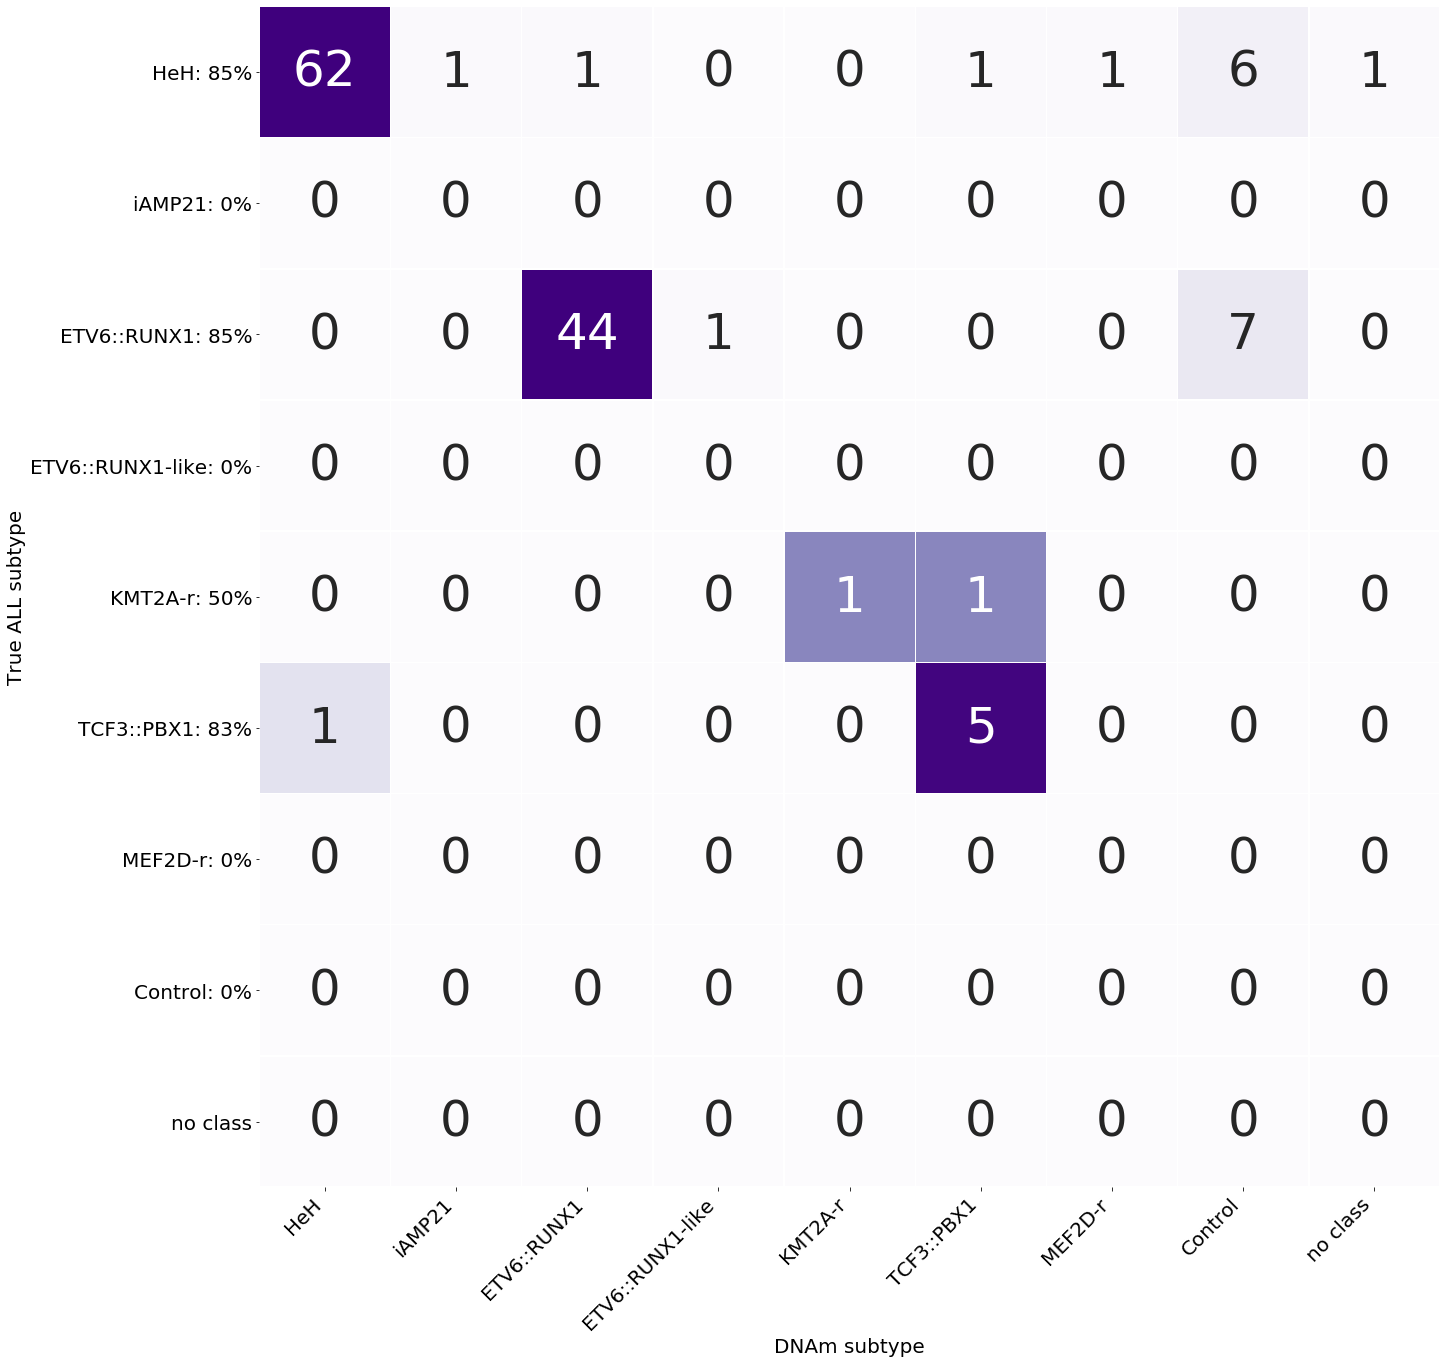

In [44]:
classes = subtypeorder.copy()
classes.append('no_class')
cm = confusion_matrix(testdf.Subtype_updated, testdf.DNAm_subtype_V2, labels = classes)
cm_norm = confusion_matrix(testdf.Subtype_updated, testdf.DNAm_subtype_V2, labels = classes, normalize = 'true')
labels = newnames
labels.append('no class')
hor, ver = cm.shape
xticks = [float(h)+0.5 for h in list(range(hor))]
yticks = [float(v)+0.5 for v in list(range(ver))]
plt.figure(figsize = (20,20))
sns.heatmap(cm_norm, annot=cm, linewidths=.5, square = True, cmap = 'Purples',  annot_kws = {'fontsize' : 50}, fmt = 'g', cbar = False)
plt.ylabel('True ALL subtype', fontsize = 20)
plt.xlabel('DNAm subtype', fontsize = 20)
plt.xticks(xticks, labels[:hor], rotation = 45, fontsize = 20, ha='right')
plt.yticks(yticks, ylabels, rotation = 0, fontsize = 20)
plt.tight_layout()

plt.show()